In [1]:
## import libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

In [2]:
data  = pd.read_csv("C:\\Users\\yucha\\machine_learning_new\\individual_profject\\mldata_0003161666.csv")

# EDA

In [4]:
data.head(6)

,Unnamed: 0,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
0,0,2,0.448450,-1.118403,-0.701763,0.951908,-1.168433,1.069023,-0.695484,-1.884696,...,1.590049,-1.033412,-1.802935,-0.079376,-0.493723,-4.312518,2.593491,0.442094,-0.247305,-0.834812
1,1,0,-0.990356,-0.979605,-1.062161,2.807091,-3.563440,2.560795,6.675487,5.127537,...,0.147898,-1.153398,-3.939144,2.689102,-1.688535,-5.339454,2.454630,-0.505949,-0.924530,-2.304756
2,2,2,3.210183,-1.427974,0.780543,-0.572612,3.376226,2.890471,5.184794,0.134013,...,0.158199,-0.560789,-0.613312,-1.059925,2.073442,0.592722,-1.353854,-1.537003,-0.684367,0.729070
3,3,2,-1.136151,0.372436,-2.225175,-0.835812,-0.572883,-0.526448,-1.909226,-1.292487,...,0.715009,-0.814727,0.896031,0.306457,0.912559,2.516981,-0.637820,0.779820,1.401161,0.111358
4,4,1,-0.001659,1.179939,0.072056,-2.944457,4.534066,-2.179715,-2.596983,-2.230131,...,0.739540,-0.240579,1.992993,0.811785,-0.475807,1.056832,-2.659472,-2.251734,-0.965351,0.284417
5,5,3,0.373745,1.088578,0.409611,0.070399,-1.303999,1.380923,1.993660,0.526932,...,0.369062,-0.167887,-0.178817,-2.384135,0.130228,-4.009568,2.235675,-0.724299,1.701588,-0.889125


In [5]:
data.isnull().sum().sum()
print(f'there are {data.isnull().sum().sum()} nan values')

there are 0 nan values


In [6]:
non_numeric_columns = data.select_dtypes(exclude=[int, float]).columns

if len(non_numeric_columns) > 0:
    print("Non-numeric columns found:")
    print(non_numeric_columns)
else:
    print("All columns contain numerical values.")


All columns contain numerical values.


In [3]:
## retrieve the labels
data_label = data.iloc[:, 1]
data_label

0      2
1      0
2      2
3      2
4      1
      ..
995    3
996    2
997    3
998    3
999    3
Name: label, Length: 1000, dtype: int64

In [7]:
data_label.unique()

array([2, 0, 1, 3, 4], dtype=int64)

In [8]:
value_counts = data_label.value_counts()
value_counts

1    210
2    209
0    196
3    195
4    190
Name: label, dtype: int64

There are 5 classes and no significant class imbalance is detected 

We now analyze the data with its features


In [4]:
## retrieve the features 
data_feature = data.iloc[:, 2: ]
data_feature

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
0,0.448450,-1.118403,-0.701763,0.951908,-1.168433,1.069023,-0.695484,-1.884696,-1.355756,0.457559,...,1.590049,-1.033412,-1.802935,-0.079376,-0.493723,-4.312518,2.593491,0.442094,-0.247305,-0.834812
1,-0.990356,-0.979605,-1.062161,2.807091,-3.563440,2.560795,6.675487,5.127537,1.875493,-0.079408,...,0.147898,-1.153398,-3.939144,2.689102,-1.688535,-5.339454,2.454630,-0.505949,-0.924530,-2.304756
2,3.210183,-1.427974,0.780543,-0.572612,3.376226,2.890471,5.184794,0.134013,0.038279,0.412082,...,0.158199,-0.560789,-0.613312,-1.059925,2.073442,0.592722,-1.353854,-1.537003,-0.684367,0.729070
3,-1.136151,0.372436,-2.225175,-0.835812,-0.572883,-0.526448,-1.909226,-1.292487,2.013554,-0.155084,...,0.715009,-0.814727,0.896031,0.306457,0.912559,2.516981,-0.637820,0.779820,1.401161,0.111358
4,-0.001659,1.179939,0.072056,-2.944457,4.534066,-2.179715,-2.596983,-2.230131,0.093716,-0.010163,...,0.739540,-0.240579,1.992993,0.811785,-0.475807,1.056832,-2.659472,-2.251734,-0.965351,0.284417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.294699,-2.486440,-0.908460,0.966602,-4.914262,1.831799,0.498425,0.553278,0.422149,-1.069673,...,0.486240,0.428186,-1.864535,2.193457,2.521919,4.501885,-1.406708,3.397345,-0.106260,1.604834
996,0.027883,-0.560067,-0.848714,0.600629,-8.540508,3.430970,6.411148,1.714479,-1.345447,-0.712576,...,1.707930,1.583881,-0.391208,0.188040,2.366422,0.268299,5.046075,-0.652789,0.406703,0.186399
997,1.114005,0.911322,0.622334,3.948580,1.379925,-1.135670,-1.962309,4.135719,1.848710,0.184161,...,0.337647,0.108467,0.778972,-3.516883,-1.494005,0.722544,1.018100,4.508997,1.063722,-0.815940
998,0.192442,-0.401166,-0.187433,0.258139,-3.931672,-0.937937,-3.560533,-0.727173,-1.223705,1.291485,...,-1.212246,0.805425,0.936785,0.843871,1.195312,4.448820,-0.125961,2.895005,0.138410,0.409245


In [11]:
data_feature.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.099956,0.092834,0.105582,-0.030086,0.315212,0.211811,0.140046,-0.151565,0.123070,0.095162,...,0.111103,0.074763,-0.019735,0.007459,0.100171,-0.365519,0.085200,-0.088923,0.092428,0.045988
std,0.983243,1.015889,1.008905,1.912678,3.802887,2.034467,3.284598,2.583170,1.048087,0.981539,...,1.000427,0.982086,1.783553,1.995118,1.735266,4.194945,2.016814,2.496087,1.018292,0.981279
min,-4.206311,-2.904672,-2.946940,-5.385620,-10.847776,-6.728830,-10.075581,-8.982672,-3.090080,-3.219706,...,-3.179710,-3.775335,-4.981447,-7.324022,-5.099627,-14.570640,-5.941743,-9.209801,-3.076472,-3.182504
25%,-0.581788,-0.574427,-0.554903,-1.303896,-2.162227,-1.156252,-2.135808,-1.829205,-0.566679,-0.566204,...,-0.563874,-0.545560,-1.256908,-1.318139,-1.021503,-3.342734,-1.321954,-1.881156,-0.610428,-0.587539
50%,0.114701,0.087220,0.080613,-0.122764,0.270123,0.210048,0.214465,-0.241742,0.099192,0.149493,...,0.096698,0.057602,-0.024164,-0.091969,0.103023,-0.110936,0.130267,-0.063041,0.104228,0.034478
75%,0.756437,0.783240,0.828977,1.264274,2.756441,1.664827,2.395733,1.511457,0.836486,0.760699,...,0.774338,0.712414,1.177615,1.313943,1.258801,2.616276,1.364751,1.572353,0.782819,0.700198
max,3.573366,3.941040,3.430393,6.212748,12.016984,5.942901,10.779970,9.095070,3.417127,3.116178,...,3.594963,2.847717,5.256158,6.506124,5.888721,10.858444,5.947863,6.950627,3.255614,3.518395


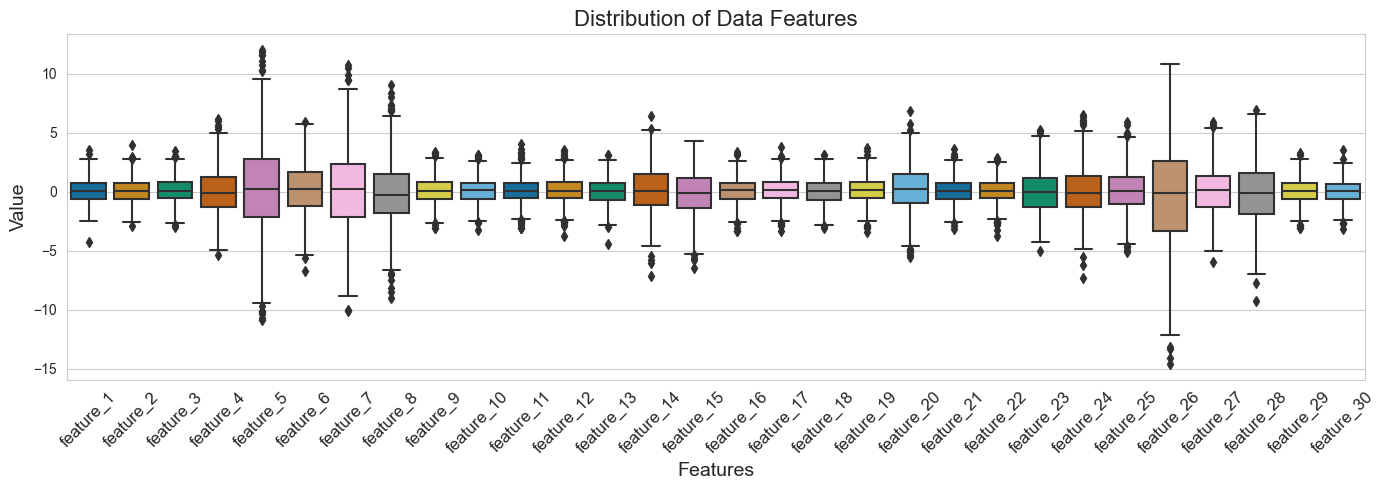

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 5))
sns.set_style("whitegrid")
plot = sns.boxplot(data=data_feature, palette='colorblind')
plt.setp(plot.get_xticklabels(), rotation=90)
plt.xticks(rotation=45, fontsize=12)

# Set title and labels
plt.title("Distribution of Data Features", fontsize=16)
plt.xlabel("Features", fontsize=14)
plt.ylabel("Value", fontsize=14)

plt.tight_layout()


The feature count is normalized to 1000 with mean centered around 0, by analyzing the datapoints (thus taking the transpose of the above matrix)
 we obtain a similar behaviour: count normalized to 30 and close to 0 mean


In [13]:
data_feature.T.describe()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,-0.193114,-0.100160,0.232531,0.199835,-0.084457,-0.080201,0.148481,-0.337231,-0.399603,0.575947,...,-0.205542,-0.043901,0.058594,-0.223486,0.516234,0.275114,0.429989,0.438885,0.248280,-0.197691
std,1.484341,2.662424,1.765317,1.168958,1.582395,1.321319,1.909224,2.401584,1.779503,1.696537,...,1.561158,2.214478,1.535790,1.663992,2.054967,1.969887,2.504121,1.868016,1.756337,2.525601
min,-4.312518,-5.339454,-2.571622,-2.225175,-2.944457,-4.009568,-4.592010,-7.939764,-5.129685,-3.692757,...,-4.216369,-6.255749,-3.811327,-5.235075,-3.454097,-4.914262,-8.540508,-3.516883,-3.931672,-9.396187
25%,-1.097155,-1.372844,-1.115446,-0.621586,-0.561978,-0.847918,-0.900212,-1.204172,-0.611977,-0.211133,...,-0.813189,-1.039179,-0.804007,-0.559737,-0.798194,-1.029370,-0.517852,-0.742178,-0.397884,-0.732338
50%,-0.370514,-0.428405,0.010305,0.225627,0.011259,-0.085795,0.076966,-0.026498,-0.027079,0.578263,...,0.023016,-0.079854,-0.127487,-0.041460,0.452247,0.425167,0.187220,0.526841,0.046562,-0.056975
75%,0.536186,1.602567,0.767674,0.866978,0.720669,0.497602,1.109600,0.599939,0.543266,1.648356,...,0.457152,0.903201,1.186264,0.670689,1.604066,1.582941,1.676918,1.313445,0.834260,1.156592
max,3.134284,6.675487,5.184794,2.516981,4.534066,2.235675,5.048653,6.291954,2.345755,4.140861,...,3.938277,5.961692,2.752271,2.756429,6.537020,4.501885,6.411148,4.508997,4.448820,3.313195


In [14]:
import scipy.stats as stats

num_standard_normal_columns = 0

for column in data_feature.T.columns:
    
    _, p_value = stats.shapiro(data_feature.T[column])
    if p_value > 0.05:
        num_standard_normal_columns += 1

print(f"Number of datapoints with normal distribution: {num_standard_normal_columns}")


Number of datapoints with normal distribution: 660


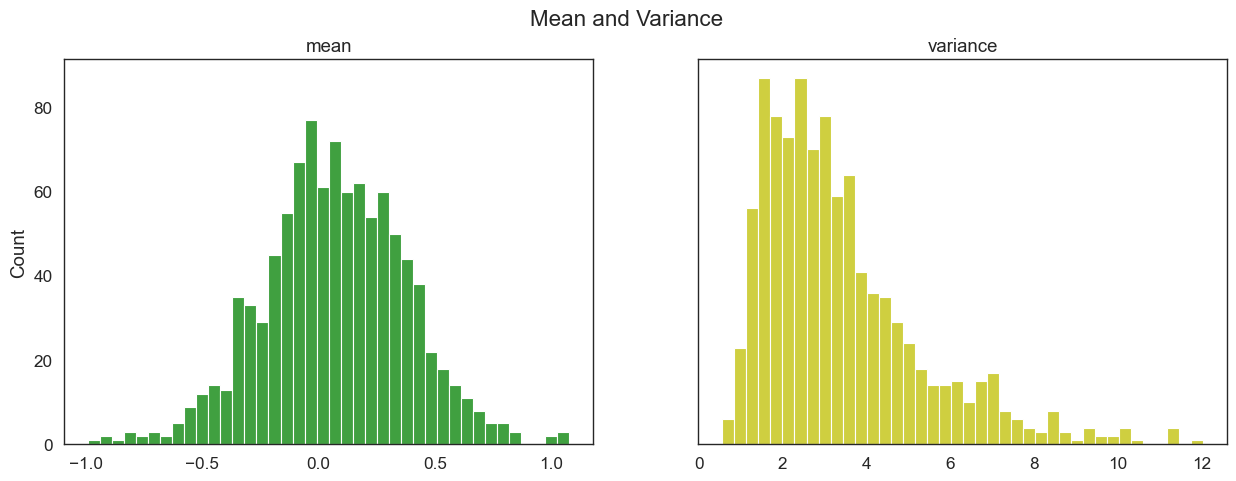

In [25]:
##calculate and plot mean and variance of each datapoint
colN = np.shape(data_feature.T)[1]
df_var, df_mean = [],[]
for i in range(colN): 
    v_df = data_feature.T[list(data_feature.T.columns)[i]] 
    df_var +=[np.var(v_df)]
    df_mean += [np.mean(v_df)]

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Mean and Variance')
sns.histplot(ax = axes[1],data = df_var, bins= 40, color = 'y') ## it worked!
sns.histplot(ax = axes[0], data = df_mean, bins = 40, color = 'g')
axes[0].set_title("mean")
axes[1].set_title('variance');

In [16]:
data=data.assign(mean=df_mean, variance = df_var)

We now analyze whether mean and variance display a different behaviour when grouped by label

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


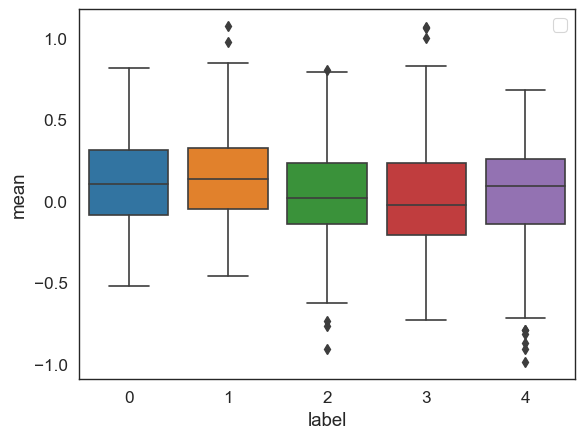

In [26]:
sns.boxplot(x = 'label',y = 'mean', data = data)
plt.legend(loc = 0);

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


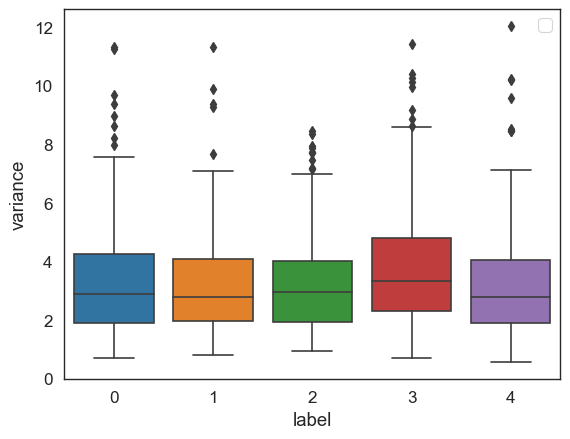

In [27]:
sns.boxplot(x = 'label',y = 'variance', data = data)### molto bello hue per differenziare e non mettere su assi
plt.legend(loc = 0);

We do not observe a significant difference in the mean expression of the features per datapoint whereas instances of class 3 tend to have a slightly higher variance compared to the other classes


## Correlation analysis 


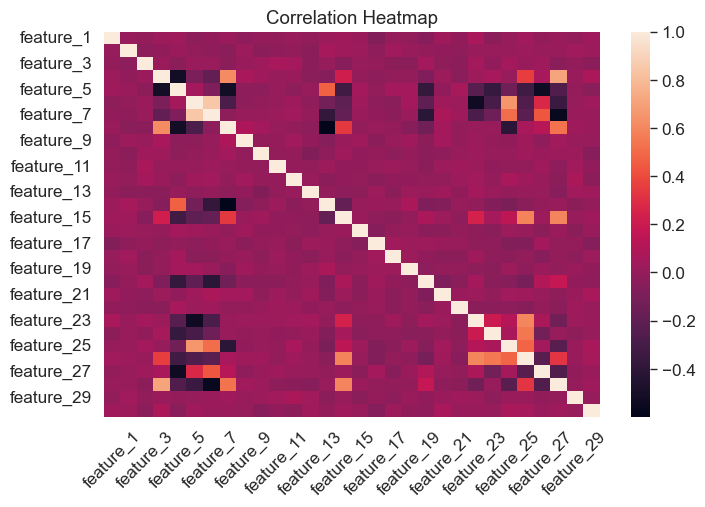

In [19]:
plt.figure(figsize= (8,5))
sns.set_context('paper', font_scale= 1.4)
plt.title('Correlation Heatmap')
corr_matrix = data_feature.corr() 
corr_matrix
sns.heatmap(corr_matrix)
plt.xticks(rotation=45);

The vast majority of pairs seem to be uncorrelated, to confirm such observation I plot the graph showing the percentage of pairs **below** a certain correlation value 

(if you happen to see similar graphs in other projects... it's likely we were in the same group for the AI Lab)

In [20]:
l_correlations = list()
for threshold_corr in np.arange(-0.7, 1, 0.015):
    n_correlations = 0
    for column in corr_matrix.columns:
        n_correlations = n_correlations + corr_matrix[column].apply(lambda x: 1 if 1 >= x> threshold_corr else 0).sum()
    l_correlations.append(n_correlations)
 

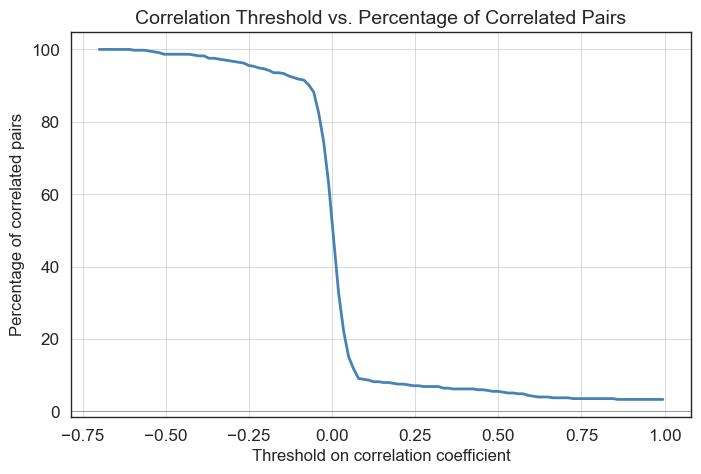

In [28]:
plt.figure(figsize=(8, 5))
plt.plot(np.arange(-0.7, 1, 0.015), [n_corrs / (corr_matrix.shape[0] * corr_matrix.shape[1]) * 100 for n_corrs in l_correlations], color='steelblue', linewidth=2)

plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)

plt.ylabel("Percentage of correlated pairs", fontsize=12)
plt.xlabel("Threshold on correlation coefficient", fontsize=12)
plt.title("Correlation Threshold vs. Percentage of Correlated Pairs", fontsize=14)

# Adjust the plot aesthetics
plt.grid(True, linestyle='-', linewidth=0.5)

plt.show()


This confirms our observation, the vast majority of pairs have correlation close to 0, as shown by the steep drop in the percentage of correlated pairs above this threshold.


# Supervised Learning

The setup for the models used will be the same: 

- Standardize data using Standard Scaler
- Split data into `train set` and `test set`, this allows us to have completely unseen data on which to estimate the generalization error of the models

In [5]:
from sklearn.preprocessing import StandardScaler
sts = StandardScaler()
scaled_data = sts.fit_transform(data_feature)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_data, data_label, test_size = 0.2, stratify = data_label, random_state= 42)
## the test set will only be used at the end, hyperparameter tuning and cross validation will be performed on the train set 

Both LinearSVC and Logistic regression use `OvR` (One versus the Rest) strategy as default when faced with MultiClass Classification. 

`OvR` involves decomposing a multiclass classification problem into multiple binary classification subproblems. In particular a separate binary classifier is trained to distinguish each class from all other classes. 

For each unique class in the dataset the following is done:
   - Treat it as the positive class and combine all other classes as the negative class.
   - Train a binary classifier using labeled data where positive samples are from the current class and negative samples are from all other classes.


Once all the binary classifiers are trained, to make a prediction for a new input, each classifier is applied to the input independently. The class associated with the classifier that yields the highest probability is assigned as the predicted class for that input.


## Linear SVC

In [16]:
from sklearn.svm import LinearSVC

lin_svm = LinearSVC(max_iter= 100000)
lin_svm.fit(X_train, y_train)

LinearSVC(max_iter=100000)

In [37]:
from sklearn.model_selection import cross_val_score
cross_val_score(lin_svm, X_train, y_train, cv = 5, scoring = "accuracy")

array([0.41875, 0.34375, 0.4375 , 0.3875 , 0.4125 ])

In [38]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(lin_svm, X_train, y_train, cv = 5)

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)
cm 

array([[88, 29, 17, 18,  5],
       [34, 82, 33,  3, 16],
       [16, 43, 51, 29, 28],
       [36, 20, 31, 31, 38],
       [15, 18, 32, 19, 68]], dtype=int64)

In [40]:
from sklearn.metrics import accuracy_score
y_pred = lin_svm.predict(X_train)
accuracy_score(y_train, y_pred)

0.45875

In [41]:
y_pred = lin_svm.predict(X_test)
accuracy_score(y_test, y_pred)

0.47

The first results yield very low accuracy, we now perform hyperparameter tuning to see wether the accuracy can be improved 

### Hyperparameter Tuning

I first perform `GridSearch` on a series of possible parameters and then perform `RandomizedSearch` in a region close to the best parameters outputted by grid search

The value `C` is the main regularization parameter and the strength of the regularization is inversely proportional to `C`

In [42]:
## first try with values from 1 to 10 
from sklearn.model_selection import GridSearchCV

param_grid = {'C': range(1, 11)}

grid_search = GridSearchCV(lin_svm, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearSVC(max_iter=100000),
             param_grid={'C': range(1, 11)})

In [43]:
best_estimator = grid_search.best_estimator_
best_parameters = best_estimator.get_params()
for param, value in best_parameters.items():
    print(f"{param}: {value}")

C: 1
class_weight: None
dual: True
fit_intercept: True
intercept_scaling: 1
loss: squared_hinge
max_iter: 100000
multi_class: ovr
penalty: l2
random_state: None
tol: 0.0001
verbose: 0


The results for GridSearch tell us that default Linear SVC performs the  best in this parameter space
 
However, given that the current value is situated at the boundary of the parameter space, in order to achieve further accuracy improvements, we should explore the region below 1.

In [82]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

param_distributions = { "C": uniform(0.01, 1)}
rnd_search_cv = RandomizedSearchCV(lin_svm, param_distributions,n_iter=20, cv=5)
rnd_search_cv.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=LinearSVC(max_iter=100000),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000029C772D9490>})

In [83]:
rnd_search_cv.best_estimator_.fit(X_train, y_train)

LinearSVC(C=0.49367645637690916, max_iter=100000)

In [84]:
from sklearn.metrics import accuracy_score
y_pred = rnd_search_cv.best_estimator_.predict(X_train)
accuracy_score(y_train, y_pred) 

0.45875

In [85]:
y_train_pred = cross_val_score(rnd_search_cv.best_estimator_, X_train, y_train, cv =5)
print(f"mean cv accuracy linearsvc : {np.mean(y_train_pred)}")
y_train_pred

mean cv accuracy linearsvc : 0.4


array([0.41875, 0.34375, 0.4375 , 0.3875 , 0.4125 ])

In [53]:
## test on unseen data 
y_pred = rnd_search_cv.best_estimator_.predict(X_test)
accuracy_score(y_test, y_pred)

0.47

### Metrics and Error Analysis

In [87]:
from sklearn.metrics import classification_report

y_train_pred_svm = cross_val_predict(rnd_search_cv.best_estimator_, X_train, y_train, cv =5)
report = classification_report(y_train, y_train_pred_svm)
print(report)

              precision    recall  f1-score   support

           0       0.47      0.56      0.51       157
           1       0.43      0.49      0.46       168
           2       0.31      0.31      0.31       167
           3       0.31      0.20      0.24       156
           4       0.44      0.45      0.44       152

    accuracy                           0.40       800
   macro avg       0.39      0.40      0.39       800
weighted avg       0.39      0.40      0.39       800



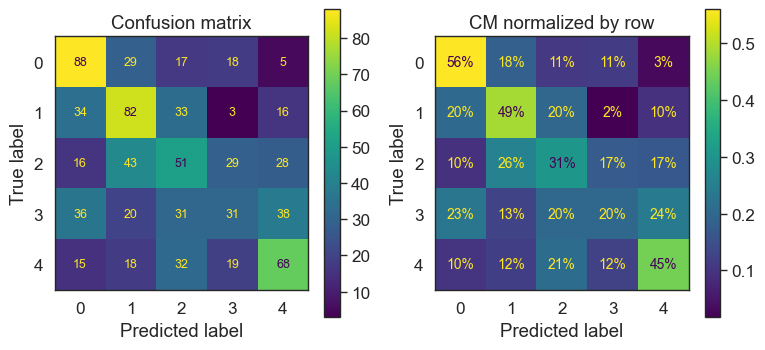

In [88]:
from sklearn.metrics import ConfusionMatrixDisplay
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred_svm, ax=axs[0])
axs[0].set_title("Confusion matrix")
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred_svm, ax=axs[1],
                                        normalize="true", values_format=".0%")
axs[1].set_title("CM normalized by row")
# save_fig("confusion_matrix_plot_1")
plt.show()

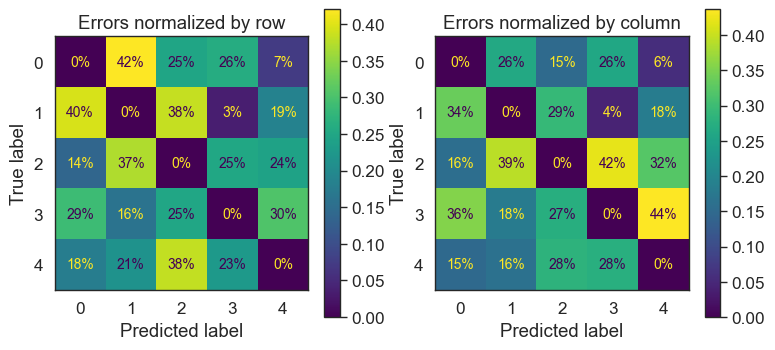

In [89]:
sample_weight = (y_train_pred_svm != y_train)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred_svm, ax=axs[0],
                                        sample_weight=sample_weight,
                                        normalize="true", values_format=".0%")
axs[0].set_title("Errors normalized by row")
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred_svm, ax=axs[1],
                                        sample_weight=sample_weight,
                                        normalize="pred", values_format=".0%")
axs[1].set_title("Errors normalized by column")

plt.show()
plt.rc('font', size=14) 

From the classification report and the error analysis we conclude that the classifier struggles mostly in classifying class 3. 

Moreover the majority of the errors come from missclassifying an instance belonging to class `i` with class `i+1` and `i-1` when they exist as shown by the normalized version of the confusion matrix.

## Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver = 'liblinear', max_iter= 10000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=10000, solver='liblinear')

In [22]:
from sklearn.model_selection import cross_val_score
cross_val_score(log_reg, X_train, y_train, cv = 5, scoring = "accuracy")


array([0.4    , 0.33125, 0.43125, 0.3875 , 0.4    ])

In [24]:
from sklearn.metrics import accuracy_score
y_pred = log_reg.predict(X_train)
accuracy_score(y_train, y_pred)

0.45875

In [25]:
y_pred = log_reg.predict(X_test)
accuracy_score(y_test, y_pred)

0.46

Default Logistic Regression performs slighty worse on unseen data than default LinearSVC

### Hyperparameter Turning

We follow the same methodology outlined in the LinearSVC section by first performing **GridSearch** and **RandomizedSearch** afterwards

In [73]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform

param_grid = { "C": range(1,11), 
              'penalty': ['l1', 'l2'] }

grid_search_log = GridSearchCV(log_reg, param_grid, verbose=1, cv=5)
grid_search_log.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=10000, solver='liblinear'),
             param_grid={'C': range(1, 11), 'penalty': ['l1', 'l2']},
             verbose=1)

In [74]:
best_estimator = grid_search_log.best_estimator_
best_parameters = best_estimator.get_params()
for param, value in best_parameters.items():
    print(f"{param}: {value}")

C: 1
class_weight: None
dual: False
fit_intercept: True
intercept_scaling: 1
l1_ratio: None
max_iter: 10000
multi_class: auto
n_jobs: None
penalty: l1
random_state: None
solver: liblinear
tol: 0.0001
verbose: 0
warm_start: False


We notice again that the best value sits at the boundary of our search space 

In [75]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

param_distributions = { "C": uniform(0.01, 1), 'penalty' : ['l1']}
rnd_search_log = RandomizedSearchCV(log_reg, param_distributions,n_iter=10,  cv=5)
rnd_search_log.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(max_iter=10000,
                                                solver='liblinear'),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000029C76E188D0>,
                                        'penalty': ['l1']})

In [76]:
rnd_search_log.best_estimator_.fit(X_train, y_train)

LogisticRegression(C=0.06805835450751238, max_iter=10000, penalty='l1',
                   solver='liblinear')

In [77]:
from sklearn.metrics import accuracy_score
y_pred = rnd_search_log.best_estimator_.predict(X_train)
accuracy_score(y_train, y_pred) 

0.4575

In [78]:
y_train_pred = cross_val_score(rnd_search_log.best_estimator_, X_train, y_train, cv =5)
print(f"mean cv accuracy logistic regression : {np.mean(y_train_pred)}")
y_train_pred

mean cv accuracy logistic regression : 0.41875


array([0.425  , 0.4125 , 0.48125, 0.39375, 0.38125])

In [307]:
y_pred = rnd_search_log.best_estimator_.predict(X_test)
accuracy_score(y_test, y_pred)

0.515

We achieve higher accuracy on unseen test data compared to Linear SVC, nevertheless the models seem to underfit. 

One possible explanation is that Logistic Regression is just too simple to learn the underlying structure of this dataset 


        

### Metrics and Error Analysis 

In [79]:
from sklearn.metrics import classification_report

y_train_pred = cross_val_predict(rnd_search_log.best_estimator_, X_train, y_train, cv =5)
report = classification_report(y_train, y_train_pred)
print(report)

              precision    recall  f1-score   support

           0       0.48      0.57      0.52       157
           1       0.46      0.60      0.52       168
           2       0.35      0.34      0.34       167
           3       0.30      0.18      0.22       156
           4       0.42      0.41      0.42       152

    accuracy                           0.42       800
   macro avg       0.40      0.42      0.40       800
weighted avg       0.40      0.42      0.41       800



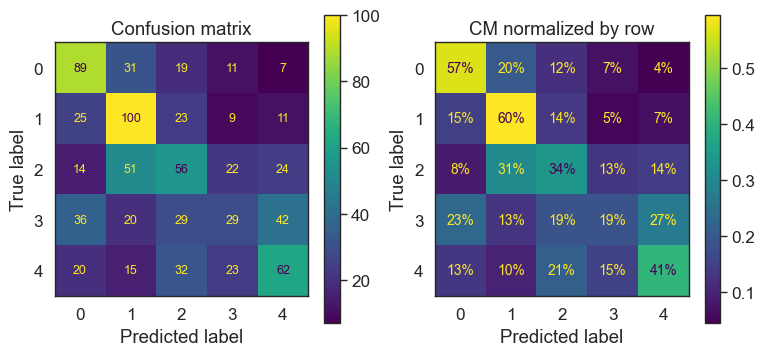

In [80]:
from sklearn.metrics import ConfusionMatrixDisplay
y_train_pred_log = cross_val_predict(rnd_search_log.best_estimator_, X_train, y_train, cv =5)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred_log, ax=axs[0])
axs[0].set_title("Confusion matrix")
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred_log, ax=axs[1],
                                        normalize="true", values_format=".0%")
axs[1].set_title("CM normalized by row")
# save_fig("confusion_matrix_plot_1")
plt.show()

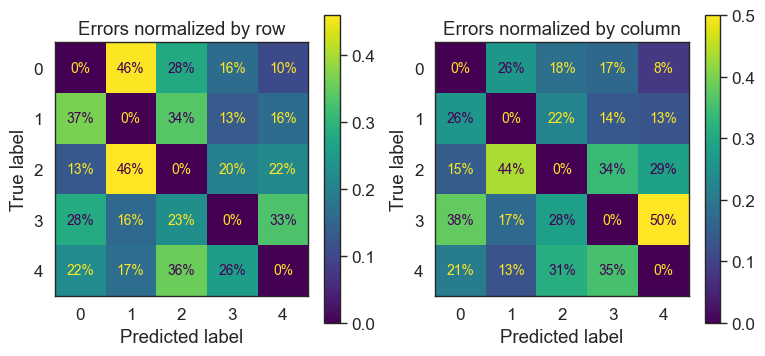

In [81]:
sample_weight = (y_train_pred_log != y_train)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred_log, ax=axs[0],
                                        sample_weight=sample_weight,
                                        normalize="true", values_format=".0%")
axs[0].set_title("Errors normalized by row")
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred_log, ax=axs[1],
                                        sample_weight=sample_weight,
                                        normalize="pred", values_format=".0%")
axs[1].set_title("Errors normalized by column")

plt.show()
plt.rc('font', size=14) 

Compared to the best model from LinearSVC this model is more accurate, especially in classifying class 1. 

Again it presents the problem of missclassifying label `i` with label `i+1` or `i-1` when they exist 

## Performance Comparison

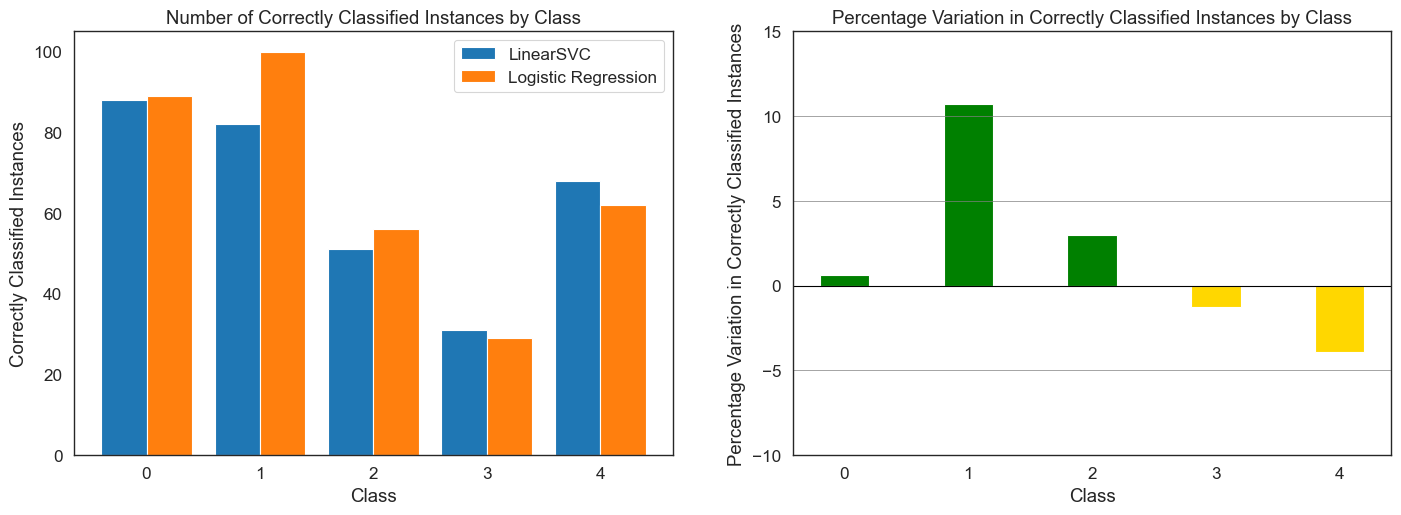

In [185]:
# Compute the total instances per class
cm1 = confusion_matrix(y_train, y_train_pred_svm)
cm2 = confusion_matrix(y_train, y_train_pred_log)
correctly_classified_cm1 = np.diag(cm1)
correctly_classified_cm2 = np.diag(cm2)
total_instances = np.sum(cm1, axis=1)

# Compute the percentage variation in correctly classified instances
percentage_variation = ((correctly_classified_cm2 - correctly_classified_cm1) / total_instances) * 100

# Define the classes (labels) for the x-axis
classes = np.arange(len(percentage_variation))

# Define the width of the bars
bar_width = 0.4

fig, axs = plt.subplots(1, 2, figsize=(17, 5.5))

# Plot the number of correctly classified instances
axs[0].bar(classes, correctly_classified_cm1, bar_width, label='LinearSVC')
axs[0].bar(classes + bar_width, correctly_classified_cm2, bar_width, label='Logistic Regression')
axs[0].set_xlabel('Class')
axs[0].set_ylabel('Correctly Classified Instances')
axs[0].set_title('Number of Correctly Classified Instances by Class')
axs[0].set_xticks(classes + bar_width/2)
axs[0].set_xticklabels(classes)
axs[0].legend()

# Add lines at each 5% interval and highlight variations
# We use svm as reference 
for i in range(-10,11, 5):
    axs[1].axhline(i, color='gray', linestyle='-', linewidth=0.5)
axs[1].axhline(0, color='black', linestyle='-', linewidth=0.8)

colors = ['gold' if v < 0 else 'green' for v in percentage_variation]
axs[1].bar(classes, percentage_variation, bar_width, color=colors)
axs[1].set_xlabel('Class')
axs[1].set_ylabel('Percentage Variation in Correctly Classified Instances')
axs[1].set_title('Percentage Variation in Correctly Classified Instances by Class')
axs[1].set_xticks(classes)
axs[1].set_ylim(-10,15)

# Adjust spacing between subplots
plt.subplots_adjust(wspace = 0.2)

plt.show()


### Feature Importance 


Logistic Regression allows us to retrieve the coefficients associated to each feature thus understanding which of those are important for a correct prediction


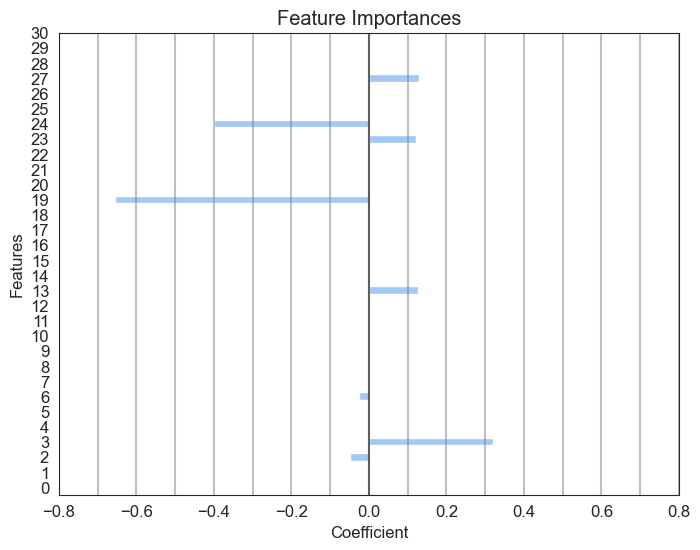

In [24]:
feat_importances = pd.Series(log_reg.coef_[0], index=data_feature.columns)

plt.figure(figsize=(8, 6))
feat_importances.plot(kind='barh')
plt.xlabel('Coefficient')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.xlim(-0.8, 0.8)

decimal_values = np.arange(-0.8, 0.9, 0.1)
for value in decimal_values:
    plt.axvline(x=value, linestyle='-', color='gray', alpha=0.5)

plt.axvline(x=0, linestyle='-', color='black', alpha=0.5)
plt.yticks(range(31), range(31))

plt.show()

Without knowing the meaning behind those features, such analysis is not particularily useful, neverthless in a real world scenario Logistic Regression (and other more powerful classifiers such as XGBoost or Catboost) all  provide ways to assess feature importance allowing us to gain insights into what leads to accurate predictions. On top of this the number of coefficients set to 0 is consistent with L1 penalization outputted by hyperparameter tuning.

## Can we do better?

In this section, that goes beyond the requirements of the project, we will briefly implement a couple of more powerful models to understand weather the low accuracy comes from the data or the simplicity of LinearSvc and Logistic Regression. In case we obtain better results, we will use these more powerful models for predictions, nevertheless in the conclusion I will put the parameters of the best LinearSVC and LogisticRegression as originally stated in the description of the project. 

### Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [13]:
from sklearn.model_selection import cross_val_score
cross_val = cross_val_score(rf_classifier, X_train, y_train, cv = 5, scoring = "accuracy")
print("Cross-validation scores  %0.5f %%(+/- %0.5f %%)" % (cross_val.mean()*100, cross_val.std()*100))
cross_val


Cross-validation scores  56.12500 %(+/- 1.82859 %)


array([0.58125, 0.5375 , 0.58125, 0.54375, 0.5625 ])

In [15]:
from sklearn.metrics import accuracy_score
y_pred = rf_classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.59

### Non Linear SVC

In [20]:
from sklearn.svm import SVC
svc = SVC(kernel = 'rbf')
svc.fit(X_train, y_train)

SVC()

In [21]:
from sklearn.model_selection import cross_val_score
cross_val = cross_val_score(svc, X_train, y_train, cv = 5, scoring = "accuracy")
print("Cross-validation scores  %0.5f %%(+/- %0.5f %%)" % (cross_val.mean()*100, cross_val.std()*100))
cross_val

Cross-validation scores  52.25000 %(+/- 2.75568 %)


array([0.55625, 0.48125, 0.5375 , 0.5    , 0.5375 ])

In [22]:

y_pred = svc.predict(X_test)
accuracy_score(y_test, y_pred)

0.53

### XGBoost

In [23]:
from xgboost import XGBClassifier
xgbclf =XGBClassifier()

xgbclf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [24]:
from sklearn.model_selection import cross_val_score
cross_val = cross_val_score(xgbclf, X_train, y_train, cv = 5, scoring = "accuracy")
print("Cross-validation scores  %0.5f %%(+/- %0.5f %%)" % (cross_val.mean()*100, cross_val.std()*100))
cross_val

Cross-validation scores  52.62500 %(+/- 7.63831 %)


array([0.5125 , 0.46875, 0.6625 , 0.44375, 0.54375])

In [25]:
y_pred = xgbclf.predict(X_test)
accuracy_score(y_test, y_pred)

0.585

We conclude that by using more powerful classifiers, we observed a significant improvement (in the case of RandomForest) in the accuracy of our classification compared to the simple models we previously utilized even by using their default settings. However, despite this improvement, the overall accuracy remains rather low due to challenging structure of this dataset.

## Prediction on Test Sets


Random Forest will be used for predictions. 

In [7]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [8]:
data_test = pd.read_csv('C:\\Users\\yucha\\machine_learning_new\\individual_profject\\mldata_0003161666.TEST_FEATURES.csv')

test_data = data_test.iloc[:, 1:].values

In [9]:
sts1 = StandardScaler()
scaled_test_data = sts1.fit_transform(test_data)

In [10]:
predictions = model.predict(scaled_test_data)

In [11]:
np.savetxt(r'./mldata_0003161666.TEST_PREDICTIONS1.txt', predictions, fmt='%d')

# CONCLUSIONS


For this particular dataset both LinearSVC and Logistic Regression achieve low accuracy, this is mainly the result of the dataset not being particularily suited for these two type of classifier in addition to being randomly generated. Nevertheless Logistic Regression after hyperparameter tuning performs better. 

| Logistic Regression | LinearSVC |
|:----------:|:----------:| 
|C=0.06805| C=0.40785|
|l1|l2|


To improve the performance, we explored more sophisticated models, which led to improvements in accuracy but not a drastic enhancement. Although these models showed some ability to capture more nuanced relationships, it is possible that the underlying complexity of the dataset necessitates the use of even more advanced algorithms or techniques.

Furthermore, it is important to note that accuracy alone may not be the sole measure of success in this task. Considering the nature of the problem, it might be worthwhile to explore alternative evaluation metrics, such as precision, recall, or F1-score, to gain a better understanding of the model's performance across different classes... but even those were kind of bad!

In conclusion, the LinearSVC and Logistic Regression models, despite being commonly used and widely applicable, demonstrated limitations in achieving high accuracy for this specific 5-class classification problem. Nevertheless I hope that the content of the report will make up for the somewhat poor results!

